In [ ]:
## Create a review scrapper for any ecommerce website to fetch real time comments, reviews, ratings, comment tags, customer name using Python.



In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
# Base URL (without page number, which we'll add)
base_url = "https://www.flipkart.com/apple-iphone-13-blue-128-gb/product-reviews/itm6c601e0a58b3c?page={}&pid=MOBG6VF5SMXPNQHG"

In [3]:
request1 = requests.get('https://www.flipkart.com/apple-iphone-13-blue-128-gb/p/itm6c601e0a58b3c?pid=MOBG6VF5SMXPNQHG&lid=LSTMOBG6VF5SMXPNQHGL5FN51&marketplace=FLIPKART&q=iphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=879c0b11-c620-4bc7-bda0-ed28e3da8540.MOBG6VF5SMXPNQHG.SEARCH&ppt=clp&ppn=samsung-mobile-store&ssid=jjk9t92he80000001744810813121&qH=0b3f45b266a97d70')
request1

<Response [200]>

In [4]:
# Data containers
data = []

In [5]:
# Loop through first pages
for page in range(1, 2):
    print(f"Fetching page {page}...")
    url = base_url.format(page)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
    }
    
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    
    # Extracting data
    names = soup.find_all('p', class_='_2NsDsF AwS1CA')  # customer names
    reviews = soup.find_all('div', class_='ZmyHeo')      # review text
    ratings = soup.find_all('div', class_='XQDdHH Ga3i8K')  # rating stars
    
    for name, review, rating in zip(names, reviews, ratings):
        data.append({
            'Customer Name': name.get_text(strip=True),
            'Rating': rating.get_text(strip=True),
            'Review': review.get_text(strip=True)
        })
    
    time.sleep(2)  # Be polite and avoid getting blocked

# Convert to DataFrame
df = pd.DataFrame(data)

Fetching page 1...


In [6]:
# Show customer-wise output
for i, row in df.iterrows():
    print(f"Customer: {row['Customer Name']}")
    print(f"Rating: {row['Rating']}")
    print(f"Review: {row['Review']}\n")

Customer: Aniket Banerjee
Rating: 5
Review: Too goodREAD MORE

Customer: Mahim Chauhan
Rating: 5
Review: I switch to ios from android after 10 years so this review might help for migratorsIt’s been a month using the iPhone13 and this was my experience1. Design - its simple and no nonsense design . Expect white and pink rest of the colours are fingerprint magnets.  I have seen all the colours and I highly recommend the pink . It’s so light pink which makes it not girlish. See it for yourself it really looks so premium in light pink colour.For rest of it except white the aluminium frame wil...READ MORE

Customer: Mahesh Jaiswara
Rating: 5
Review: LOOK - Its my first love apple i phone 13, first time purchase this phone but its look awesome in white colour love it.  hand feel too much premium.CAMERA - Mind blowing camera performance font camera and rear cameras take too much awesome qualities pictures . Night mode is supergood low light performance impressed mePERFORMANCE - its bionic a15

In [7]:
# Export to CSV
df.to_csv('reviews.csv', index=False)
print("\n✅ Data saved to reviews.csv")


✅ Data saved to reviews.csv


In [8]:
from PIL import Image 
from IPython.display import display

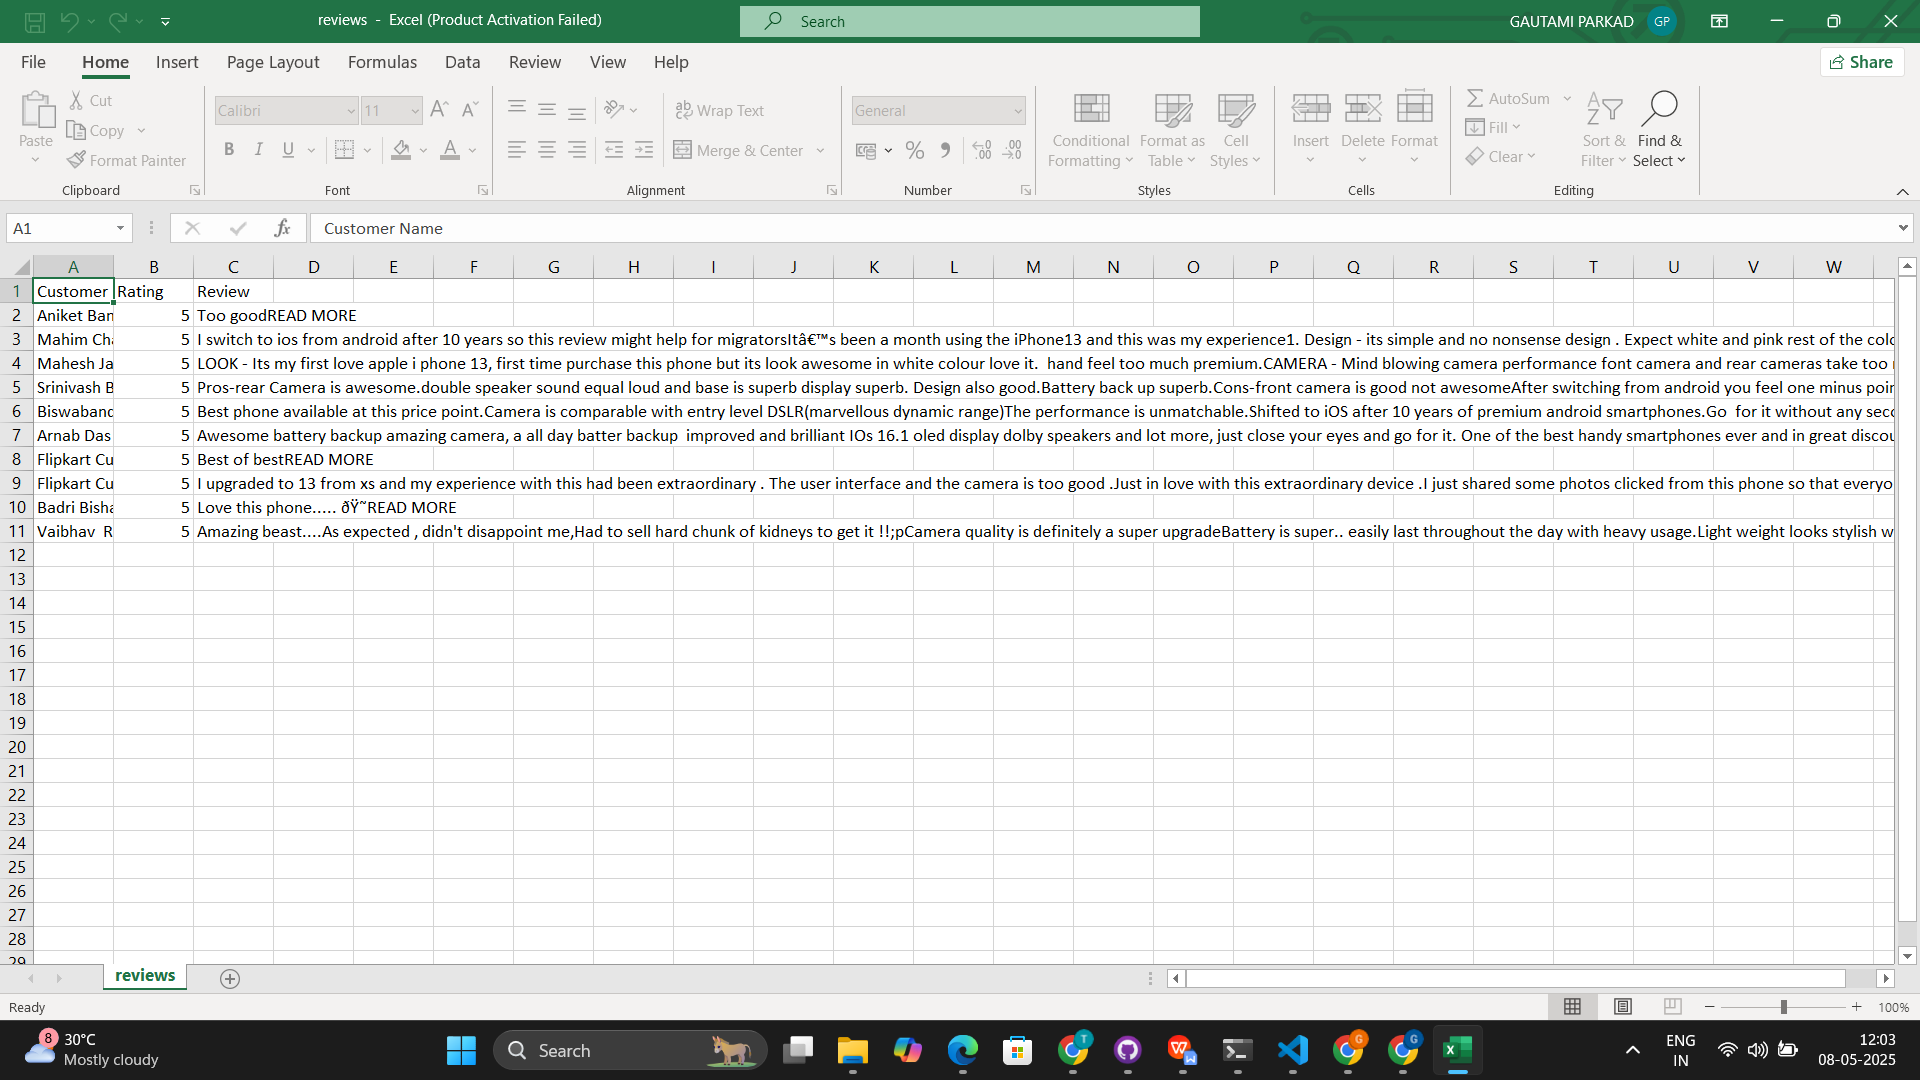

In [9]:
img = Image. open('o.PNG')
display(img)